<h1>Harry Amante</h1>
<hr>
<h2>Data Analytics</h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
road_acci_df = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
road_acci_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Descriptive</h2>

In [4]:
road_acci_df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h2>Checking Null values</h2>

In [5]:
road_acci_df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Filling up Null Values</h2>

In [6]:
road_acci_df['Latitude'].mean()

np.float64(52.553865761110956)

In [7]:
road_acci_df['Latitude'] = road_acci_df['Latitude'].fillna(road_acci_df['Latitude'].mean())
road_acci_df['Accident Date'] = road_acci_df['Accident Date'].fillna(road_acci_df['Accident Date'].mode()[0])
road_acci_df['Longitude'] = road_acci_df['Longitude'].fillna(road_acci_df['Longitude'].mean())
road_acci_df['Road_Surface_Conditions'] = road_acci_df['Road_Surface_Conditions'].fillna(road_acci_df['Road_Surface_Conditions'].mode()[0])
road_acci_df['Road_Type'] = road_acci_df['Road_Type'].fillna(road_acci_df['Road_Type'].mode()[0])
road_acci_df['Urban_or_Rural_Area'] = road_acci_df['Urban_or_Rural_Area'].fillna(road_acci_df['Urban_or_Rural_Area'].mode()[0])
road_acci_df['Weather_Conditions'] = road_acci_df['Weather_Conditions'].fillna(road_acci_df['Weather_Conditions'].mode()[0])

In [8]:
road_acci_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Changing Data Types</h2>

In [9]:
road_acci_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [10]:
road_acci_df['Index'] = road_acci_df['Index'].astype('category')
road_acci_df['Accident_Severity'] = road_acci_df['Accident_Severity'].astype('category')
road_acci_df['Accident Date'] = road_acci_df['Accident Date'].astype('category')
road_acci_df['Light_Conditions'] = road_acci_df['Light_Conditions'].astype('category')
road_acci_df['District Area'] = road_acci_df['District Area'].astype('category')
road_acci_df['Road_Surface_Conditions'] = road_acci_df['Road_Surface_Conditions'].astype('category')
road_acci_df['Road_Type'] = road_acci_df['Road_Type'].astype('category')
road_acci_df['Urban_or_Rural_Area'] = road_acci_df['Urban_or_Rural_Area'].astype('category')
road_acci_df['Weather_Conditions'] = road_acci_df['Weather_Conditions'].astype('category')
road_acci_df['Vehicle_Type'] = road_acci_df['Vehicle_Type'].astype('category')

In [11]:
road_acci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Explanatory Data Analysis(EDA)</h2>

<h2>1. What vehicles types has more accident record?</h2>

In [12]:
vehicle_acc = road_acci_df['Vehicle_Type'].mode()[0]
vehicle_acc

'Car'

<h2>Insight#1</h2>

<h1>Converting date to date time</h1>

In [13]:
road_acci_df['Accident Date'] = pd.to_datetime(road_acci_df['Accident Date'],dayfirst=True, errors='coerce')

In [14]:
road_acci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Making column for month,year,day</h2>

In [15]:
road_acci_df['Month'] = road_acci_df['Accident Date'].dt.month
road_acci_df['Year'] = road_acci_df['Accident Date'].dt.year
road_acci_df['Day'] = road_acci_df['Accident Date'].dt.day
road_acci_df['Day_of_Week'] = road_acci_df['Accident Date'].dt.dayofweek


# road_acci_df['Month'] = road_acci_df['Month'].dt.month
# road_acci_df['Year'] = road_acci_df['Accident Date'].dt.year
# road_acci_df['Day'] = road_acci_df['Accident Date'].dt.day
# road_acci_df['Day_of_Week'] 

In [16]:
road_acci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

In [17]:
road_acci_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Month                      0
Year                       0
Day                        0
Day_of_Week                0
dtype: int64

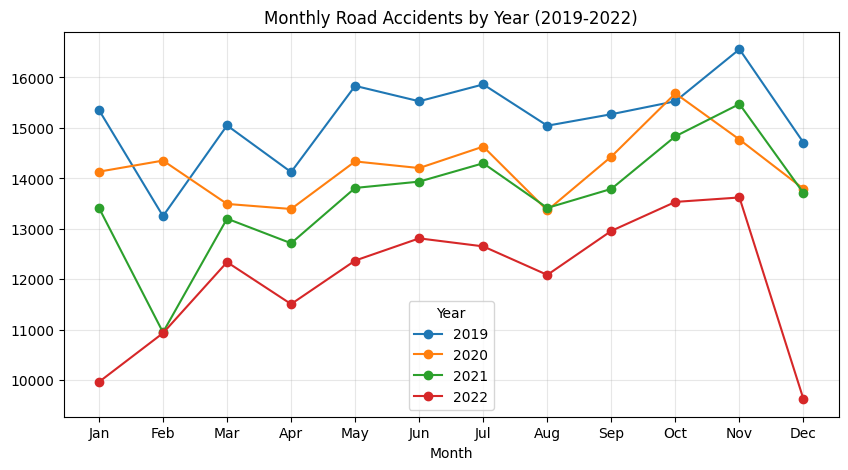

In [18]:
# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = road_acci_df.groupby(['Year', 'Month'])['Index'].count()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
                  marker='o', 
                  figsize=(10, 5),
                  title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [19]:
road_acci_df.dtypes

Index                      category
Accident_Severity          category
Accident Date              category
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
Month                         int32
Year                          int32
Day                           int32
Day_of_Week                   int32
dtype: object

In [21]:
london_df = road_acci_df[road_acci_df["District Area"] == "London City"]
birmingham_df = road_acci_df[road_acci_df["District Area"] == "Birmingham"]
leeds_df = road_acci_df[road_acci_df["District Area"] == "Leeds"]
manchester_df = road_acci_df[road_acci_df["District Area"] == "Manchester"]
bradford_df = road_acci_df[road_acci_df["District Area"] == "Bradford"]
sheffield_df = road_acci_df[road_acci_df["District Area"] == "Sheffield"]

<h2>Briminghan District Insight</h2>

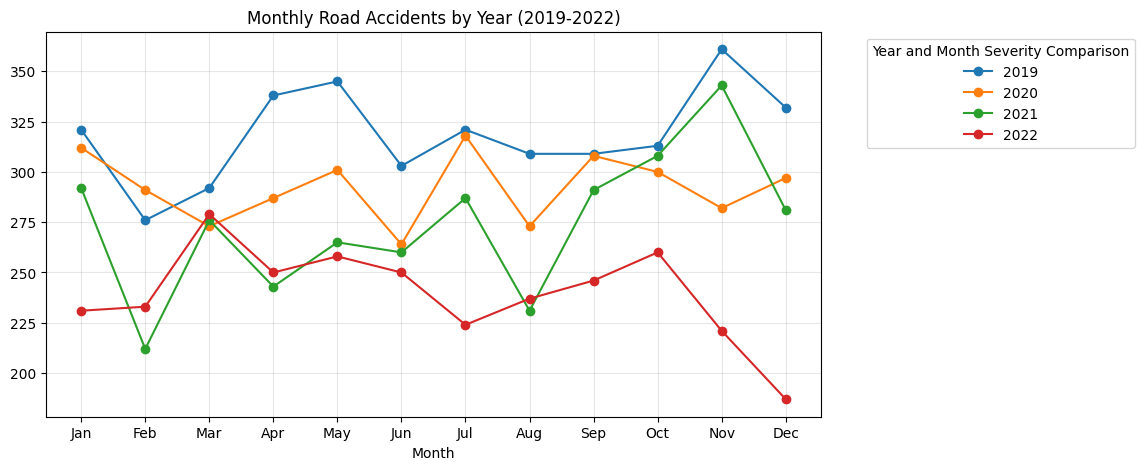

In [27]:
monthly_data = birmingham_df.groupby(['Year', 'Month']).size()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [29]:
road_acci_df.dtypes

Index                      category
Accident_Severity          category
Accident Date              category
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
Month                         int32
Year                          int32
Day                           int32
Day_of_Week                   int32
dtype: object

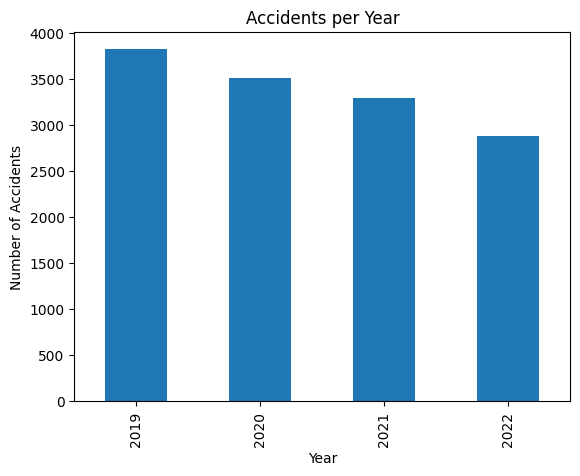

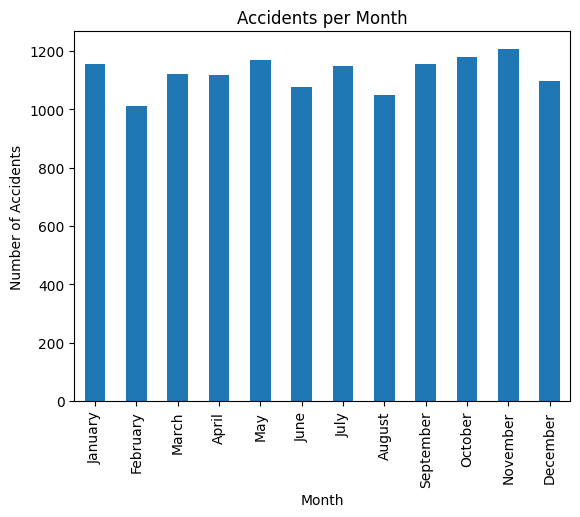

Day_of_Week
Monday       1417
Tuesday      1984
Wednesday    2094
Thursday     2040
Friday       1944
Saturday     2154
Sunday       1858
Name: count, dtype: int64


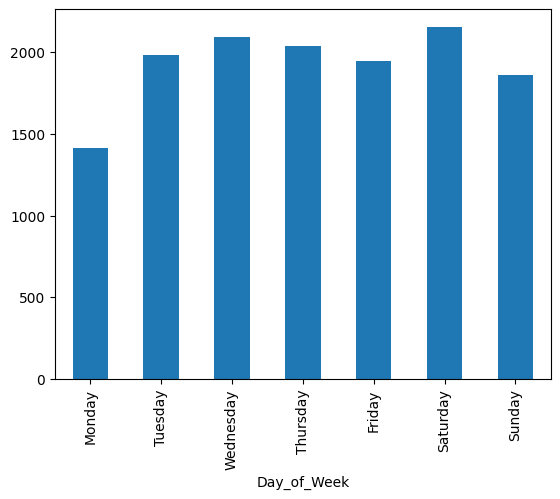

In [30]:
accidents_per_year = birmingham_df['Year'].value_counts().sort_index()
accidents_per_month = birmingham_df['Month'].value_counts().sort_index()
accidents_per_day = birmingham_df['Day_of_Week'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [22]:

import folium 
from folium.plugins import HeatMap
birmingham_locations = list(zip(birmingham_df["Latitude"],birmingham_df["Longitude"]))
birmingham_map = folium.Map(location=[birmingham_df["Latitude"].mean(),birmingham_df["Longitude"].mean()], zoom_start=10)
HeatMap(birmingham_locations).add_to(birmingham_map)
birmingham_map.save('birmingham_map.html')
birmingham_map